In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Iris.csv",index_col = 'Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
df.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [8]:
df.groupby('Species').SepalLengthCm.max()

Species
Iris-setosa        5.8
Iris-versicolor    7.0
Iris-virginica     7.9
Name: SepalLengthCm, dtype: float64


# EDA

In [9]:
# Setosa Vs Versicolor Vs Virginica

In [10]:
df_species = df.groupby('Species', axis=0).mean()
df_species

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


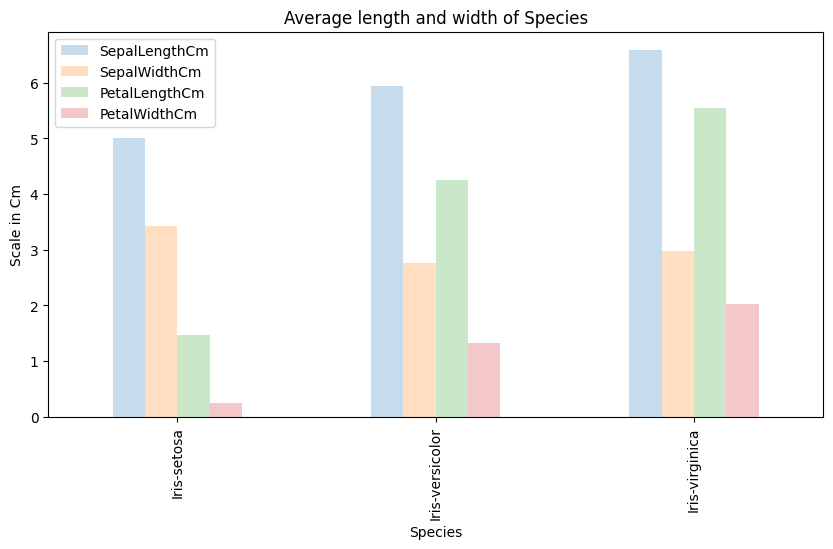

In [11]:
df_species.plot(kind='bar',
               stacked=False,
               alpha=0.25,
               figsize=(10,5))
plt.title('Average length and width of Species')
plt.ylabel('Scale in Cm')
plt.show()


In [12]:
# Box plot

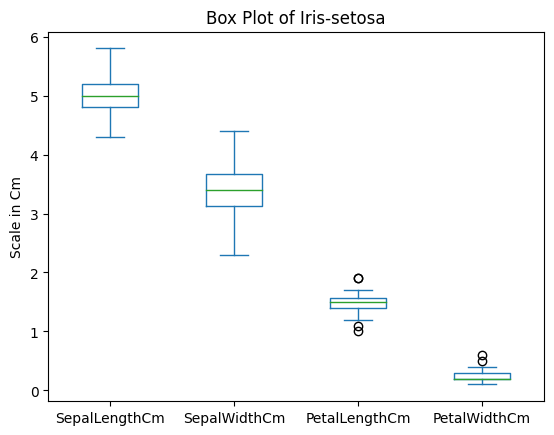

In [13]:
df_setosa = df.loc[df['Species']=='Iris-setosa']

df_setosa.plot(kind='box')
plt.title('Box Plot of Iris-setosa')
plt.ylabel('Scale in Cm')
plt.show()

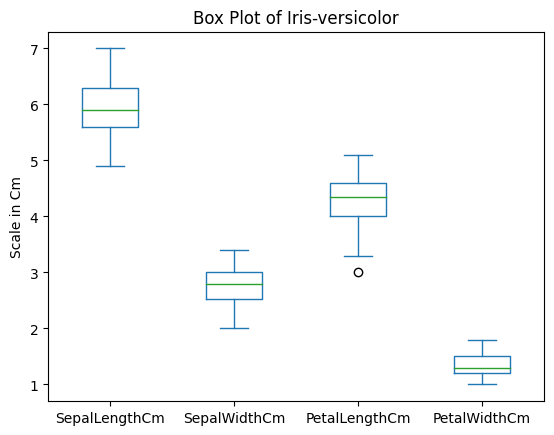

In [14]:
df_versicolor = df.loc[df['Species']=='Iris-versicolor']

df_versicolor.plot(kind='box')
plt.title('Box Plot of Iris-versicolor')
plt.ylabel('Scale in Cm')
plt.show()

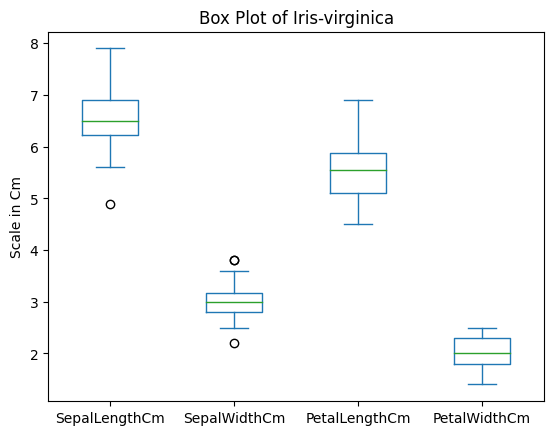

In [15]:
df_virginica = df.loc[df['Species']=='Iris-virginica']

df_virginica.plot(kind='box')
plt.title('Box Plot of Iris-virginica')
plt.ylabel('Scale in Cm')
plt.show()

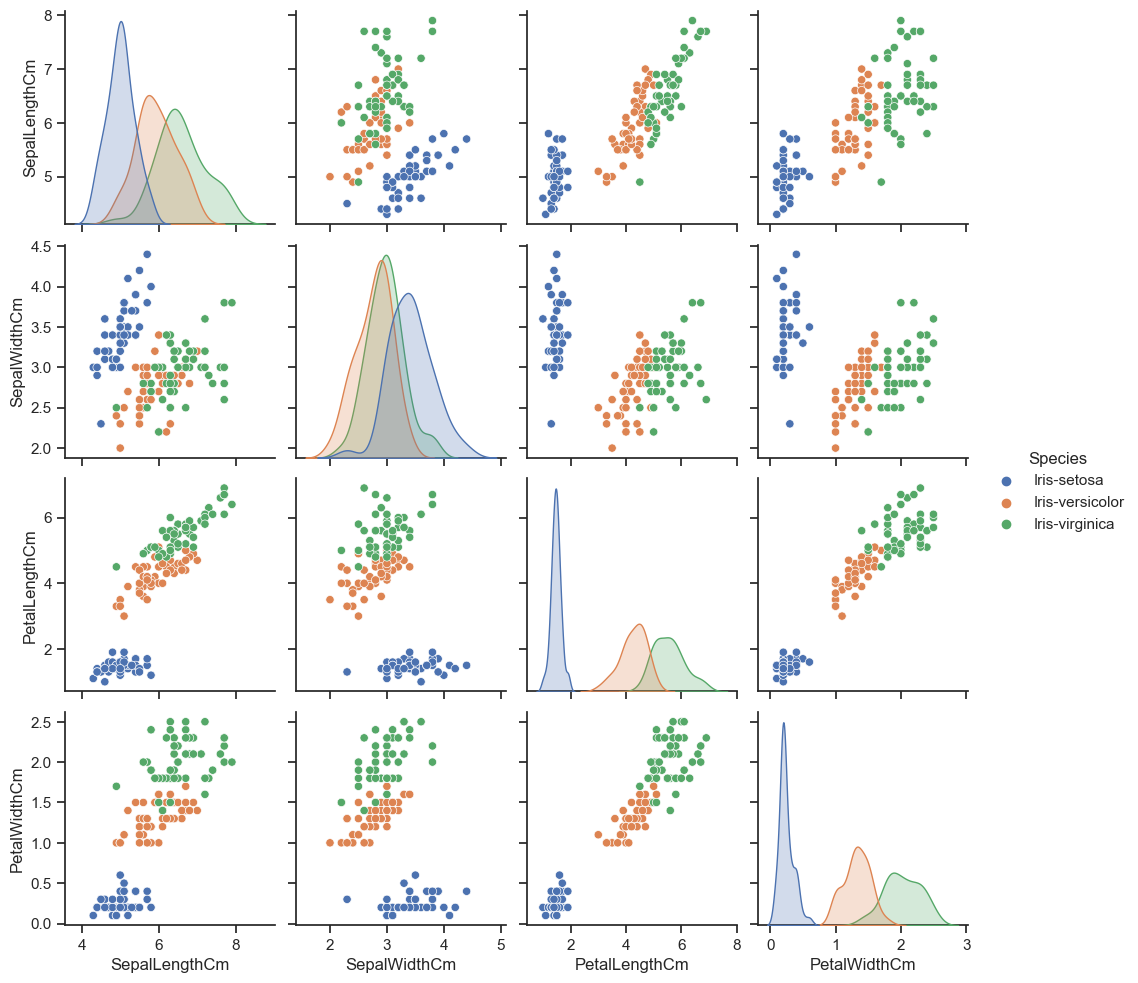

In [16]:
sns.set_theme(style="ticks")
sns.pairplot(data=df, hue='Species')


<AxesSubplot: >

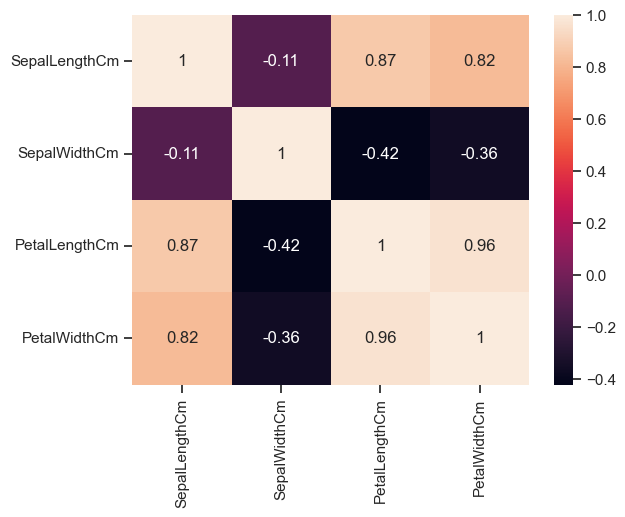

In [17]:
sns.heatmap(data = df.iloc[:,df.columns!='Species'].corr(), annot=True)


# Modelling

In [18]:
# Splitting Dataset into Training and Testing data

In [19]:
x = df.iloc[:,df.columns!='Species']
y = df['Species']

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [51]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x_scaled, y, test_size=0.2, random_state=5)

In [52]:
x_train

array([[-9.00681170e-01,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-4.16009689e-01, -1.74477836e+00,  1.37235899e-01,
         1.33225943e-01],
       [-1.73673948e-01, -1.05056946e+00, -1.47092621e-01,
        -2.61192967e-01],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [ 1.40150837e+00,  3.37848329e-01,  5.35295827e-01,
         2.64698913e-01],
       [-1.02184904e+00,  5.69251294e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.03205722e+00, -1.22754100e+00,
        -7.87084847e-01],
       [ 2.24968346e+00, -1.24957601e-01,  1.33141568e+00,
         1.44795564e+00],
       [-1.02184904e+00,  1.03205722e+00, -1.39813811e+00,
        -1.18150376e+00],
       [ 6.74501145e-01,  3.37848329e-01,  8.76490051e-01,
         1.44795564e+00],
       [-5.25060772e-02, -8.19166497e-01,  7.62758643e-01,
         9.22063763e-01],
       [-2.94841818e-01, -1.28197243e+00,  8.03701950e-02,
      

In [53]:
y_train

Id
40         Iris-setosa
54     Iris-versicolor
80     Iris-versicolor
11         Iris-setosa
51     Iris-versicolor
            ...       
9          Iris-setosa
74     Iris-versicolor
145     Iris-virginica
119     Iris-virginica
100    Iris-versicolor
Name: Species, Length: 120, dtype: object

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [55]:
# fit the training data
lr.fit(x_train, y_train)

LogisticRegression()

In [56]:
lr.intercept_

array([-0.22898898,  1.82748477, -1.59849579])

In [57]:
lr.coef_

array([[-1.0415817 ,  1.0649302 , -1.73651077, -1.65106808],
       [ 0.70710758, -0.45981193, -0.25797611, -0.93092034],
       [ 0.33447412, -0.60511827,  1.99448689,  2.58198843]])

In [58]:
# predict using training data
y_hat = lr.predict(x_test)

In [59]:
# R^2 on training data
lr.score(x_train, y_train)

0.975

In [60]:
# R^2 on testing data
lr.score(x_test, y_test)

0.9

In [61]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

classification_report(y_hat, y_test)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00         8\nIris-versicolor       0.91      0.83      0.87        12\n Iris-virginica       0.82      0.90      0.86        10\n\n       accuracy                           0.90        30\n      macro avg       0.91      0.91      0.91        30\n   weighted avg       0.90      0.90      0.90        30\n'

In [87]:
m1 = accuracy_score(y_hat, y_test)

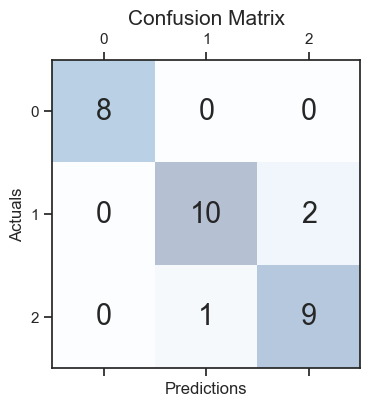

In [66]:
# plot confusion matrix

conf_matrix = confusion_matrix(y_hat, y_test)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

# KNN

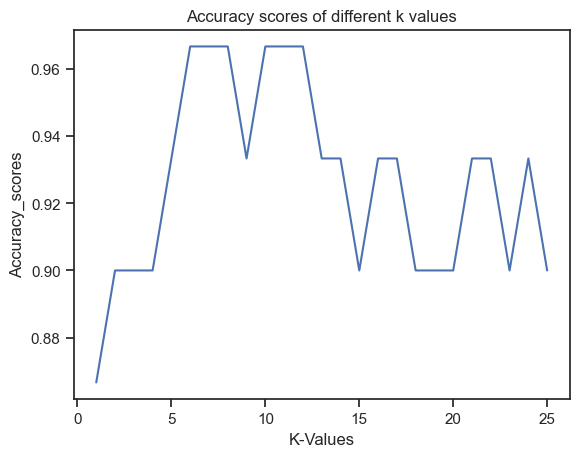

In [88]:
from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(1,26))
score = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_hat = knn.predict(x_test)
    score.append(accuracy_score(y_hat, y_test))
    
m2 = max(score)
    
plt.plot(k_range, score)
plt.title('Accuracy scores of different k values')
plt.ylabel('Accuracy_scores')
plt.xlabel('K-Values')
plt.show()

# SVM

In [82]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=0.1)

svm_model.fit(x_train, y_train)
y_hat = svm_model.predict(x_test)

In [89]:
m3 = accuracy_score(y_hat, y_test)

# Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()

forest_model.fit(x_train, y_train)
y_hat = forest_model.predict(x_test)

In [90]:
m4 = accuracy_score(y_hat, y_test)

# Comparing Accuracy of all model

<AxesSubplot: xlabel='Models', ylabel='Accuracy_Score'>

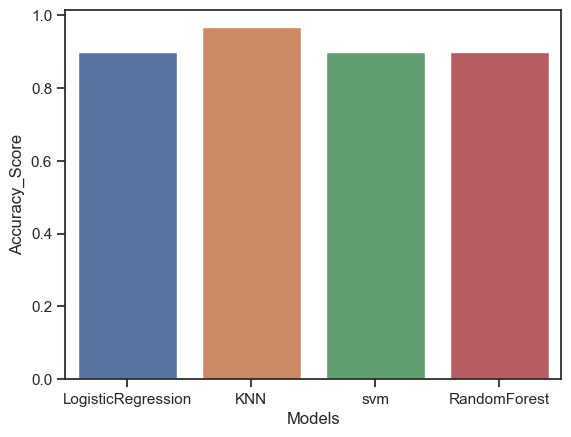

In [99]:
compare_df = pd.DataFrame({'Models':['LogisticRegression','KNN','svm','RandomForest'],
                           'Accuracy_Score':[m1,m2,m3,m4]
                          })
sns.barplot(data=compare_df, x='Models', y='Accuracy_Score')